In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
import shutil
import bs4
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
import pyautogui
import cv2
import time

In [ ]:
#read image
img = cv2.imread('captcha_img.jpeg')

In [2]:
#CONTOURS FUNCTION
def bin_img(image):
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = cv2.threshold(img_gray, 242, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')

    return binary_img

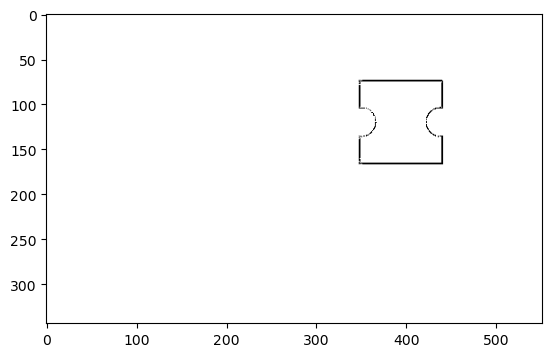

In [3]:
capt = bin_img('captcha_img.jpeg')

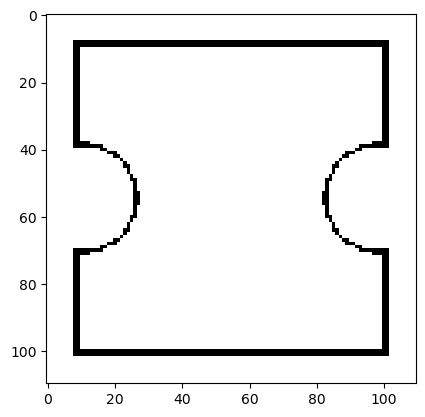

In [4]:
piece = bin_img('captcha_piece.jpeg')

In [5]:
#match 2 image
match = cv2.matchTemplate(capt, piece, cv2.TM_CCOEFF_NORMED)

#result
cv2.imshow('result', match)
cv2.waitKey()
cv2.destroyAllWindows()

#check x, y
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

#x, y coordinate
print(max_loc)
print(max_val)

#width and height
w = piece.shape[1]
h = piece.shape[0]

In [9]:
#make rectangle in x, y coordinate
cv2.rectangle(img, max_loc, (max_loc[0]+w, max_loc[1]+h), (0, 255, 255), 2)

array([[[168, 100,   1],
        [168, 100,   1],
        [168, 100,   1],
        ...,
        [199, 123,  23],
        [199, 123,  23],
        [199, 123,  23]],

       [[168, 100,   1],
        [168, 100,   1],
        [168, 100,   1],
        ...,
        [203, 127,  27],
        [202, 126,  26],
        [202, 126,  26]],

       [[168, 100,   1],
        [168, 100,   1],
        [168, 100,   1],
        ...,
        [207, 130,  33],
        [206, 129,  32],
        [206, 129,  32]],

       ...,

       [[ 57,  48,  44],
        [ 54,  48,  43],
        [ 56,  47,  43],
        ...,
        [117, 105, 103],
        [117, 105, 103],
        [117, 105, 103]],

       [[ 72,  65,  62],
        [ 69,  64,  61],
        [ 71,  64,  61],
        ...,
        [ 88,  80,  80],
        [ 90,  82,  82],
        [ 92,  84,  84]],

       [[ 74,  69,  66],
        [ 73,  68,  65],
        [ 72,  67,  64],
        ...,
        [108, 102, 103],
        [108, 102, 103],
        [108, 102, 103]]

In [10]:
#show the reult
cv2.imshow('jawab', img)
cv2.waitKey()
cv2.destroyAllWindows()